# **Experiment with multiple scaling method**
#### In this file, we conduct an experiment using stockait to compare performance using four different scaling methods, under conditions of the same trader.

In [2]:
import sys
sys.path.append("/project/stockAI/github/main/stockait")

import pandas as pd
import stockait as sai

-----

<br> 

# **1. Data Acquisition** 

#### The experiment reduces data and uses only a total of 600 events in KOSPI.

In [ ]:
lst_tickers = sai.get_tickers(markets=['KOSPI'])
print(len(lst_tickers), lst_tickers[:5])

In [ ]:
raw_data = sai.load_data(date=['2016-01-01', '2021-12-31'], tickers=lst_tickers[:600])
print(raw_data.shape)
raw_data.head()

<br> 
<br> 


# **2. Data Preprocessing** 
#### Data preprocessing is carried out in the same way as the previous tutorial, and the scaling part uses all four methods to generate four data.

## **1) add_index** 
#### First, add a supplementary indicator.

In [24]:
check_index = ['MA5', 'MA20', 'MA60','MA120', 
             'next_change','CMF','VPT','VMAP', "ADI",
             'BHB','BLB','KCH','KCL','KCM','DCH','DCL','DCM','UI',
             'SMA','EMA','WMA','MACD','VIneg','VIpos','TRIX','MI','CCI','DPO','KST','Ichimoku','ParabolicSAR','STC',
             'RSI','SRSI','TSI','UO','SR','WR','AO','ROC','PPO','PVO']

check_df = sai.add_index(data=raw_data, index_list=check_index)
check_df

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 595/595 [09:39<00:00,  1.03it/s]


,Code,Date,Open,High,Low,Close,Volume,Change,MA5,MA20,...,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO
0,000020,2016-06-29,9850,10100,9700,9750,352292,-0.001025,9544.0,10210.00,...,45.763505,0.529126,-8.116135,0.0,41.176471,-58.823529,-827.794118,-3.940887,-1.408719,-11.019576
1,000020,2016-06-30,9850,10400,9760,10100,466248,0.035897,9618.0,10195.00,...,51.232344,0.875363,-6.553028,0.0,54.901961,-45.098039,-765.088235,-2.415459,-1.124410,-9.119594
2,000020,2016-07-01,10200,10200,9960,9960,208228,-0.013861,9794.0,10148.00,...,49.099659,0.767924,-5.911240,0.0,49.411765,-50.588235,-624.205882,-4.230769,-1.001426,-12.558989
3,000020,2016-07-04,10000,10400,9900,10400,275210,0.044177,9994.0,10135.50,...,55.385557,1.000000,-3.312304,0.0,66.666667,-33.333333,-427.205882,-0.952381,-0.541344,-13.975141
4,000020,2016-07-05,10400,10450,10200,10350,156010,-0.004808,10112.0,10118.00,...,54.560981,0.961700,-1.483696,0.0,64.705882,-35.294118,-266.529412,1.970443,-0.216142,-17.711174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750398,5307W1,2021-12-23,3420,3480,3370,3425,391929,0.007353,3440.0,3535.00,...,40.390231,0.159714,-8.758815,0.0,20.000000,-80.000000,-126.044118,-5.647383,-0.810232,-11.033540
750399,5307W1,2021-12-24,3465,3520,3420,3500,313474,0.021898,3438.0,3529.50,...,47.968313,0.589811,-8.179822,0.0,43.076923,-56.923077,-138.058824,-3.047091,-0.740535,-10.762865
750400,5307W1,2021-12-27,3515,3515,3465,3475,265569,-0.007143,3446.0,3527.25,...,45.874782,0.494226,-8.285385,0.0,35.384615,-64.615385,-134.838235,-4.005525,-0.734518,-11.598254
750401,5307W1,2021-12-28,3500,3520,3455,3515,359215,0.011511,3463.0,3532.75,...,49.660421,0.719680,-7.274530,0.0,52.542373,-47.457627,-114.720588,-2.361111,-0.630225,-9.883604


<br> 

## **2) scaling**
#### Next, we perform scaling of the four stock price data provided by stockait.

### **min-max scaler** 

In [25]:
scaled_minmax = sai.scaling(data=check_df, scaler_type="minmax")
scaled_minmax.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 586/586 [00:58<00:00, 10.09it/s]


,Code,Date,Open,High,Low,Close,Volume,Change,MA5,MA20,...,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO
0,000020,2016-06-29,0.194499,0.168374,0.201232,9750,352292,-0.001025,0.187465,0.222265,...,45.763505,0.529126,-8.116135,0.0,41.176471,-58.823529,-827.794118,-3.940887,-1.408719,-11.019576
1,000020,2016-06-30,0.194499,0.17862,0.203696,10100,466248,0.035897,0.19065,0.221465,...,51.232344,0.875363,-6.553028,0.0,54.901961,-45.098039,-765.088235,-2.415459,-1.124410,-9.119594
2,000020,2016-07-01,0.208251,0.17179,0.21191,9960,208228,-0.013861,0.198227,0.218958,...,49.099659,0.767924,-5.911240,0.0,49.411765,-50.588235,-624.205882,-4.230769,-1.001426,-12.558989
3,000020,2016-07-04,0.200393,0.17862,0.209446,10400,275210,0.044177,0.206836,0.218291,...,55.385557,1.000000,-3.312304,0.0,66.666667,-33.333333,-427.205882,-0.952381,-0.541344,-13.975141
4,000020,2016-07-05,0.21611,0.180328,0.221766,10350,156010,-0.004808,0.211915,0.217358,...,54.560981,0.961700,-1.483696,0.0,64.705882,-35.294118,-266.529412,1.970443,-0.216142,-17.711174


### **standard scaler** 

In [26]:
scaled_standard = sai.scaling(data=check_df, scaler_type="standard")
scaled_standard.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 586/586 [00:26<00:00, 21.84it/s]


,Code,Date,Open,High,Low,Close,Volume,Change,MA5,MA20,...,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO
0,000020,2016-06-29,-0.426667,-0.40741,-0.422378,9750,352292,-0.001025,-0.497811,-0.336067,...,45.763505,0.529126,-8.116135,0.0,41.176471,-58.823529,-827.794118,-3.940887,-1.408719,-11.019576
1,000020,2016-06-30,-0.426667,-0.339931,-0.407372,10100,466248,0.035897,-0.479964,-0.339741,...,51.232344,0.875363,-6.553028,0.0,54.901961,-45.098039,-765.088235,-2.415459,-1.124410,-9.119594
2,000020,2016-07-01,-0.343357,-0.384917,-0.357352,9960,208228,-0.013861,-0.437518,-0.351253,...,49.099659,0.767924,-5.911240,0.0,49.411765,-50.588235,-624.205882,-4.230769,-1.001426,-12.558989
3,000020,2016-07-04,-0.390963,-0.339931,-0.372358,10400,275210,0.044177,-0.389284,-0.354314,...,55.385557,1.000000,-3.312304,0.0,66.666667,-33.333333,-427.205882,-0.952381,-0.541344,-13.975141
4,000020,2016-07-05,-0.295751,-0.328684,-0.297327,10350,156010,-0.004808,-0.360826,-0.358600,...,54.560981,0.961700,-1.483696,0.0,64.705882,-35.294118,-266.529412,1.970443,-0.216142,-17.711174


### **robust scaler**

In [27]:
scaled_robust = sai.scaling(data=check_df, scaler_type="robust")
scaled_robust.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 586/586 [00:44<00:00, 13.26it/s]


,Code,Date,Open,High,Low,Close,Volume,Change,MA5,MA20,...,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO
0,000020,2016-06-29,0.016653,0.060905,-0.009898,9750,352292,-0.001025,-0.037510,0.080375,...,45.763505,0.529126,-8.116135,0.0,41.176471,-58.823529,-827.794118,-3.940887,-1.408719,-11.019576
1,000020,2016-06-30,0.016653,0.114006,0.000723,10100,466248,0.035897,-0.024412,0.077720,...,51.232344,0.875363,-6.553028,0.0,54.901961,-45.098039,-765.088235,-2.415459,-1.124410,-9.119594
2,000020,2016-07-01,0.078605,0.078605,0.036124,9960,208228,-0.013861,0.006741,0.069401,...,49.099659,0.767924,-5.911240,0.0,49.411765,-50.588235,-624.205882,-4.230769,-1.001426,-12.558989
3,000020,2016-07-04,0.043204,0.114006,0.025504,10400,275210,0.044177,0.042142,0.067188,...,55.385557,1.000000,-3.312304,0.0,66.666667,-33.333333,-427.205882,-0.952381,-0.541344,-13.975141
4,000020,2016-07-05,0.114006,0.122857,0.078605,10350,156010,-0.004808,0.063029,0.064091,...,54.560981,0.961700,-1.483696,0.0,64.705882,-35.294118,-266.529412,1.970443,-0.216142,-17.711174


### **div-close scaler**

In [28]:
scaled_div_close = sai.scaling(data=check_df, scaler_type="div-close")
scaled_div_close.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 586/586 [00:26<00:00, 21.94it/s]


,Code,Date,Open,High,Low,Close,Volume,Change,MA5,MA20,...,RSI,SRSI,TSI,UO,SR,WR,AO,ROC,PPO,PVO
0,000020,2016-06-29,1.010256,1.035897,0.994872,9750,352292,-0.001025,0.978872,1.047179,...,45.763505,0.529126,-8.116135,0.0,41.176471,-58.823529,-827.794118,-3.940887,-1.408719,-11.019576
1,000020,2016-06-30,1.010256,1.066667,1.001026,10100,466248,0.035897,0.986462,1.045641,...,51.232344,0.875363,-6.553028,0.0,54.901961,-45.098039,-765.088235,-2.415459,-1.124410,-9.119594
2,000020,2016-07-01,1.009901,1.009901,0.986139,9960,208228,-0.013861,0.969703,1.004752,...,49.099659,0.767924,-5.911240,0.0,49.411765,-50.588235,-624.205882,-4.230769,-1.001426,-12.558989
3,000020,2016-07-04,1.004016,1.044177,0.993976,10400,275210,0.044177,1.003414,1.017620,...,55.385557,1.000000,-3.312304,0.0,66.666667,-33.333333,-427.205882,-0.952381,-0.541344,-13.975141
4,000020,2016-07-05,1.0,1.004808,0.980769,10350,156010,-0.004808,0.972308,0.972885,...,54.560981,0.961700,-1.483696,0.0,64.705882,-35.294118,-266.529412,1.970443,-0.216142,-17.711174


<br> 

### **min-max, standard, robust, div-close** standardized with a total of four scalers, resulting in four data.

<br> 

## **3) Convert to time series data**
#### If the date predicted by the machine learning model is D0, it is converted into n-matched time series data as shown in the figure below. (=> D-n-1, D-n-2, D-n-3, ..., D-3, D-2, D-1 and D0)
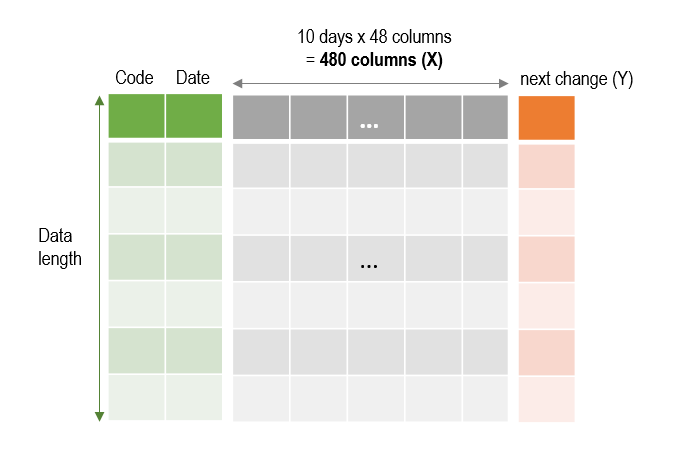

In [29]:
# original dataset
df_time_series = sai.time_series(check_df, day=10)

# scaled dataset 
df_time_series_minmax = sai.time_series(scaled_minmax, day=10)
df_time_series_standard = sai.time_series(scaled_standard, day=10)
df_time_series_robust = sai.time_series(scaled_robust, day=10)
df_time_series_div_close = sai.time_series(scaled_div_close, day=10)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 586/586 [02:18<00:00,  4.23it/s]


<br>
<br>

# **3. Trader Definition**
#### Since the data is all ready, define `Trader`.
#### Declare an empty list `lst_trader` as in the previous tutorial, and put four traders in it.

In [30]:
lst_trader = []

In [31]:
from lightgbm import LGBMClassifier

# conditional_buyer: Object that determines acquisition based on data filtering conditions 
b1_lg = sai.ConditionalBuyer()

def sampling1(df): # Create a conditional function
    condition1 = (-0.3 <= df.D0_Change) & (df.D0_Change <= 0.3) # Remove exceptions that exceed upper and lower limits
    condition2 = (df.D0_Close * df.D0_Volume) >= 1000000000 # condition 1: Transaction amount of more than 1 billion won 
    condition3 = (-0.05 >= df.D0_Change) | (0.05 <= df.D0_Change) # condition 2: Today's stock price change rate is more than 5%
    condition = condition1 & condition2 & condition3
    return condition

b1_lg.condition = sampling1  # Define the condition function directly (sampling1) and store it in the condition property 


# machinelearning_buyer: Object that determines acquisition by machine learning model
b2_lg = sai.MachinelearningBuyer()

# Save user-defined models to algorithm properties
scale_pos_weight = round(72/28 , 2)
params = {  'random_state' : 42,
            'scale_pos_weight' : scale_pos_weight,
            'learning_rate' : 0.1, 
            'num_iterations' : 1000,
            'max_depth' : 4,
            'n_jobs' : 30,
            'boost_from_average' : False,
            'objective' : 'binary' }

b2_lg.algorithm =  LGBMClassifier( **params )


# SubSeller: Object that determines selling all of the following days
sell_all = sai.SubSeller() 

#### Since we will use traders with the same conditions, we will share the same `condition` and `algorithm`.
#### To distinguish between traders, put the `name` attribute differently as shown below.

In [32]:
trader_name = ["trader_minmax", "trader_standard", "trader_robust", "trader_div-close"]
for name in trader_name:    
    trader = sai.Trader()
    trader.name = name # Trader's name
    trader.label = 'class&0.02' # Set the Trader dependent variable (do not set if it is regression analysis) 
    trader.buyer = sai.Buyer([b1_lg, b2_lg]) # [ conditional buyer, machinelearning buyer ] 
    trader.seller = sai.Seller(sell_all)
    
    lst_trader.append(trader)

<br> 
<br> 

# **4. Trader(Model) Fitting & Evauation**

## **1) Save Dataset to Traders**
#### When lst_trader and data (train/valid/test dataset of original/scaled dataset) are put into the factor, the dataset is stored inside each trader.

In [33]:
df_time_series = df_time_series[~(df_time_series["Code"].isin(["33626K", "33637k", '33637K']))]
df_time_series_minmax = df_time_series_minmax[~(df_time_series_minmax["Code"].isin(["33626K", "33637k", '33637K']))]
df_time_series_standard = df_time_series_standard[~(df_time_series_standard["Code"].isin(["33626K", "33637k", '33637K']))]
df_time_series_robust = df_time_series_robust[~(df_time_series_robust["Code"].isin(["33626K", "33637k", '33637K']))]
df_time_series_div_close = df_time_series_div_close[~(df_time_series_div_close["Code"].isin(["33626K", "33637k", '33637K']))]

# train, test dataset split
train_data = df_time_series[(df_time_series['Date'] >= '2017-01-01') & (df_time_series['Date'] <= '2020-12-31')]
valid_data = df_time_series[(df_time_series['Date'] >= '2021-01-01') & (df_time_series['Date'] <= '2021-06-31')]
test_data = df_time_series[(df_time_series['Date'] >= '2021-07-01') & (df_time_series['Date'] <= '2021-12-31')]

# train, test dataset split (scaled) 
train_data_minmax = df_time_series_minmax[(df_time_series_minmax['Date'] >= '2017-01-01') & (df_time_series_minmax['Date'] <= '2020-12-31')]
valid_data_minmax = df_time_series_minmax[(df_time_series_minmax['Date'] >= '2021-01-01') & (df_time_series_minmax['Date'] <= '2021-06-31')]
test_data_minmax = df_time_series_minmax[(df_time_series_minmax['Date'] >= '2021-07-01') & (df_time_series_minmax['Date'] <= '2021-12-31')]

train_data_standard = df_time_series_standard[(df_time_series_standard['Date'] >= '2017-01-01') & (df_time_series_standard['Date'] <= '2020-12-31')]
valid_data_standard = df_time_series_standard[(df_time_series_standard['Date'] >= '2021-01-01') & (df_time_series_standard['Date'] <= '2021-06-31')]
test_data_standard = df_time_series_standard[(df_time_series_standard['Date'] >= '2021-07-01') & (df_time_series_standard['Date'] <= '2021-12-31')]

train_data_robust = df_time_series_robust[(df_time_series_robust['Date'] >= '2017-01-01') & (df_time_series_robust['Date'] <= '2020-12-31')]
valid_data_robust = df_time_series_robust[(df_time_series_robust['Date'] >= '2021-01-01') & (df_time_series_robust['Date'] <= '2021-06-31')]
test_data_robust = df_time_series_robust[(df_time_series_robust['Date'] >= '2021-07-01') & (df_time_series_robust['Date'] <= '2021-12-31')]

train_data_div_close = df_time_series_div_close[(df_time_series_div_close['Date'] >= '2017-01-01') & (df_time_series_div_close['Date'] <= '2020-12-31')]
valid_data_div_close = df_time_series_div_close[(df_time_series_div_close['Date'] >= '2021-01-01') & (df_time_series_div_close['Date'] <= '2021-06-31')]
test_data_div_close = df_time_series_div_close[(df_time_series_div_close['Date'] >= '2021-07-01') & (df_time_series_div_close['Date'] <= '2021-12-31')]

In [34]:
lst_dataset_scaled = [[train_data_minmax, valid_data_minmax, test_data_minmax], 
                      [train_data_standard, valid_data_standard, test_data_standard],
                     [train_data_robust, valid_data_robust, test_data_robust],
                     [train_data_div_close, valid_data_div_close, test_data_div_close]]

for i in range(4): 
    lst_trader_one = [lst_trader[i]]
    sai.save_dataset(lst_trader_one, train_data, test_data, lst_dataset_scaled[i][0], lst_dataset_scaled[i][1], lst_dataset_scaled[i][2])

== trader_minmax ==
== train_code_date: (542390, 2),  test_code_date: (139968, 2) ==
== trainX: (542390, 470),  testX: (139968, 470) ==
== trainX_scaled: (542390, 470),  testX_scaled: (139968, 470) ==
== trainY: (542390,),  testY: (139968,) ==
== trainY_classification: (542390,),  testY_classification: (139968,) ==

== trader_standard ==
== train_code_date: (542390, 2),  test_code_date: (139968, 2) ==
== trainX: (542390, 470),  testX: (139968, 470) ==
== trainX_scaled: (542390, 470),  testX_scaled: (139968, 470) ==
== trainY: (542390,),  testY: (139968,) ==
== trainY_classification: (542390,),  testY_classification: (139968,) ==

== trader_robust ==
== train_code_date: (542390, 2),  test_code_date: (139968, 2) ==
== trainX: (542390, 470),  testX: (139968, 470) ==
== trainX_scaled: (542390, 470),  testX_scaled: (139968, 470) ==
== trainY: (542390,),  testY: (139968,) ==
== trainY_classification: (542390,),  testY_classification: (139968,) ==

== trader_div-close ==
== train_code_date: (

<br> 

## **2) Model fitting**
#### Artificial intelligence model learning is performed with models and learning datasets stored in lst_trader, respectively.

In [35]:
sai.trader_train(lst_trader) 

== trader_minmax Model Fitting Completed ==
== trader_standard Model Fitting Completed ==
== trader_robust Model Fitting Completed ==
== trader_div-close Model Fitting Completed ==


<br> 

## **3) Model evaluation and threshold settings**
### **Model evaluationModel evaluation**
#### Each trader visualizes evaluation indicators for each threshold (auc score, precision, recall, f1 score).

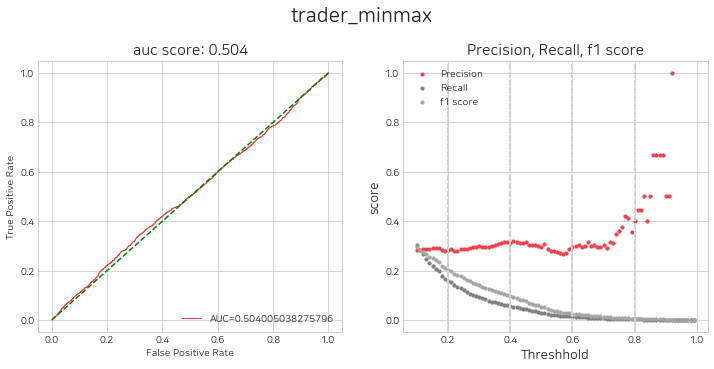

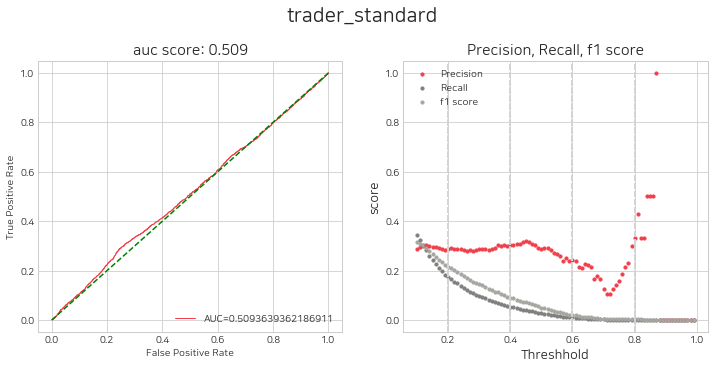

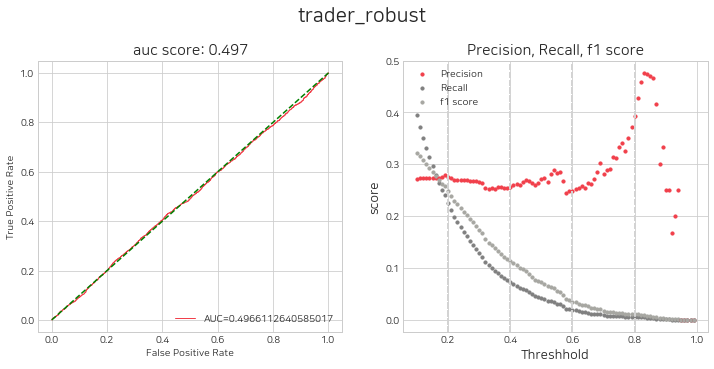

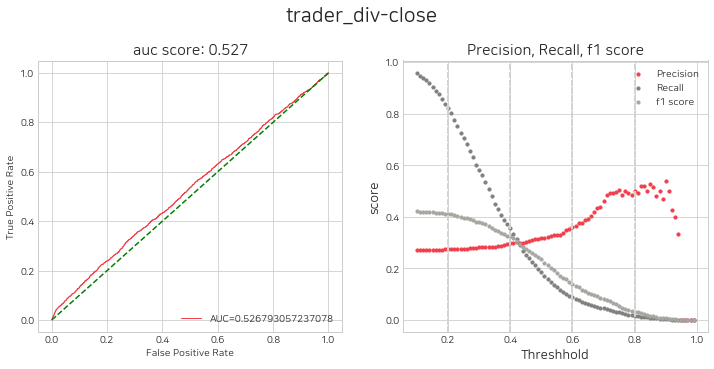

In [36]:
sai.get_eval_by_threshold(lst_trader)

### **threshold settings**
#### Above, a predicted probability threshold to buy stocks is set based on the visualization of the evaluation index.
#### If you set it to histogram=True, it also outputs a histogram that verifies how much revenue you can earn from the validation dataset. By changing the threshold value to the lst_threshold factor, the threshold value can be determined with verified profitability.
#### For example, if the threshold value is 0.8, the average rate of change at the next day's closing price for data with a prediction probability of 0.8 or more is 2.948 so a return of 2.948 can be expected.

Error: local variable 'threshold' referenced before assignment


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

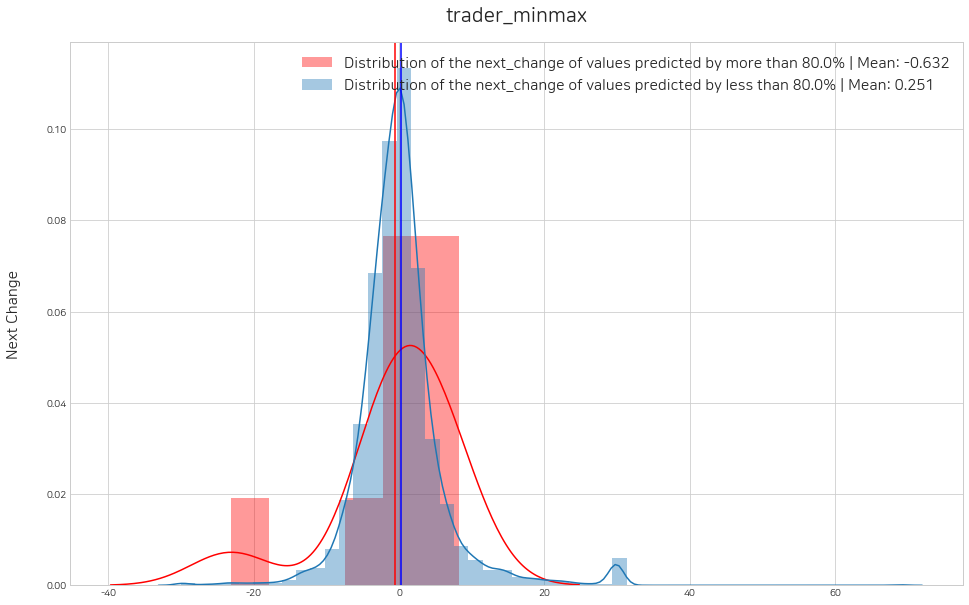

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

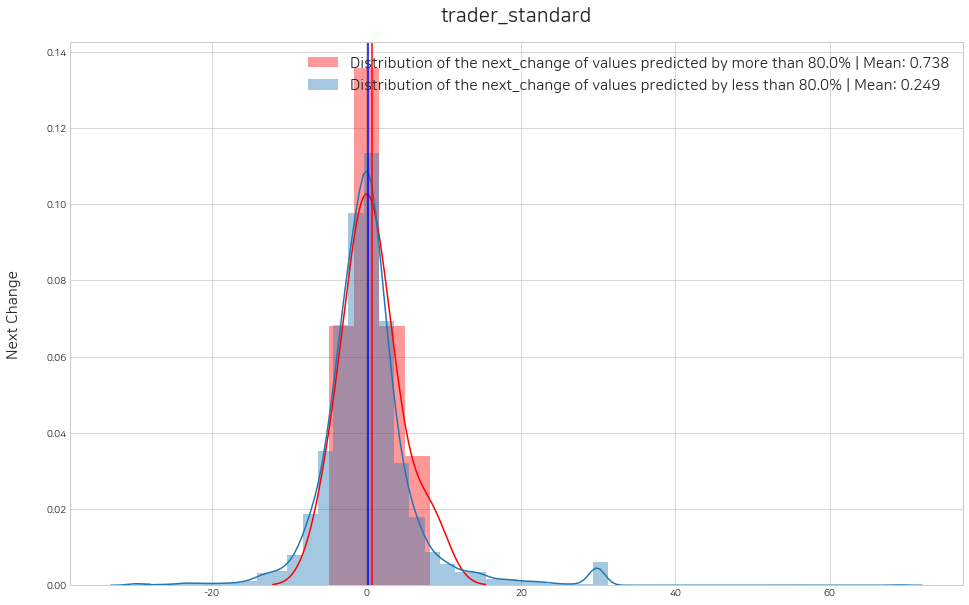

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

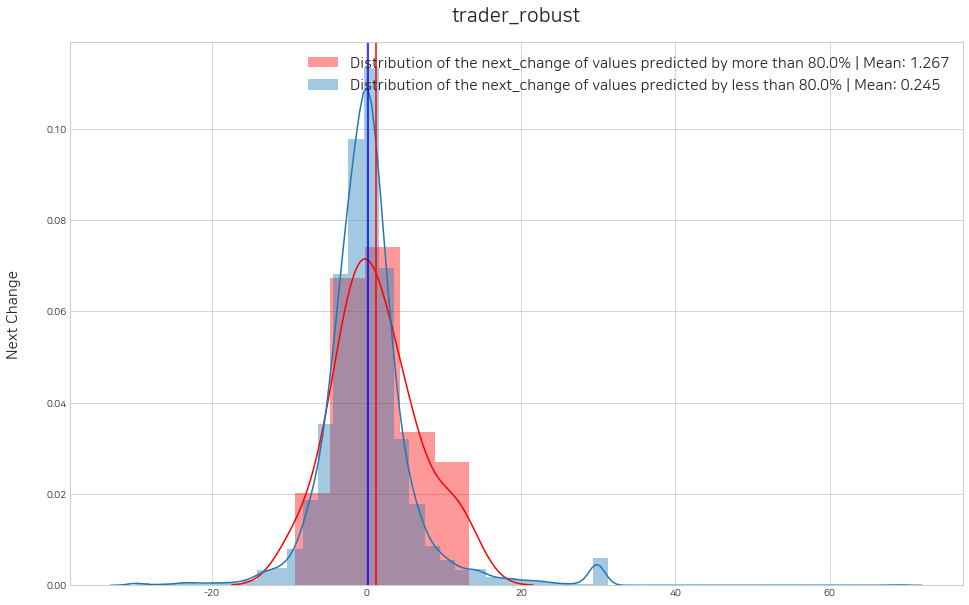

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

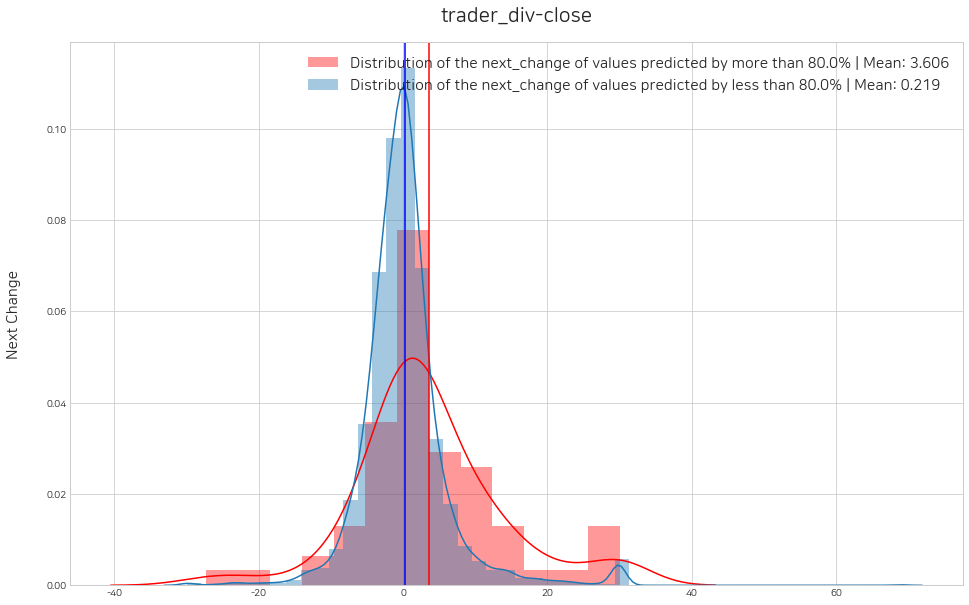

In [37]:
sai.set_threshold(lst_trader, lst_threshold=[0.8, 0.8, 0.8, 0.8], histogram=True)

<br> 
<br> 

# **4. Back-Testing**

## **1) Making a sales log**
#### For each trader, put the trading log that generated the buying and selling records for all dates in df_signal_all.

In [38]:
df_signal_all = sai.decision(lst_trader, dtype='test')
df_signal_all

139968it [00:03, 36309.18it/s]
139968it [00:03, 35560.93it/s]


== trader_minmax completed ==


139968it [00:03, 36491.79it/s]
139968it [00:03, 36350.87it/s]


== trader_standard completed ==


139968it [00:03, 35696.38it/s]
139968it [00:03, 36391.64it/s]


== trader_robust completed ==


139968it [00:03, 36208.76it/s]
139968it [00:03, 35618.92it/s]


== trader_div-close completed ==


,Trader_id,Date,Code,+(buy)/-(sell),Amount,Close
0,trader_minmax,2021-01-04,000020,+,0.0,19100.0
1,trader_minmax,2021-01-05,000020,+,0.0,19400.0
2,trader_minmax,2021-01-06,000020,+,0.0,19700.0
3,trader_minmax,2021-01-07,000020,+,0.0,19700.0
4,trader_minmax,2021-01-08,000020,+,0.0,19100.0
...,...,...,...,...,...,...
139963,trader_div-close,2021-12-22,5307W1,-,1.0,3400.0
139964,trader_div-close,2021-12-23,5307W1,-,1.0,3425.0
139965,trader_div-close,2021-12-24,5307W1,-,1.0,3500.0
139966,trader_div-close,2021-12-27,5307W1,-,1.0,3475.0


<br> 

## **2) Simulation: Calculate the yield**
#### Calculate the return on each trader based on the trading journal **df_signal_all** obtained above.
#### Enter the initial budget in the `init_budget` factor, and put the fee in the `fee` factor.

In [39]:
df_history_all = sai.simulation(df_signal_all, init_budget=10000000, init_stock={}, fee=0.01)
df_history_all

100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 245/246 [00:10<00:00, 24.31it/s]


== trader_div-close completed ==


100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 245/246 [00:10<00:00, 24.29it/s]


== trader_minmax completed ==


100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 245/246 [00:10<00:00, 24.32it/s]


== trader_robust completed ==


100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 245/246 [00:10<00:00, 24.29it/s]

== trader_standard completed ==


,Trader_id,Sell_date,Budget,Yield,Stock
0,trader_div-close,2021-01-04,10000000,0.000000,{}
1,trader_div-close,2021-01-05,10860611,8.606110,{'006340': 7142}
2,trader_div-close,2021-01-06,10860611,8.606110,{}
3,trader_div-close,2021-01-07,10860611,8.606110,{}
4,trader_div-close,2021-01-08,10860611,8.606110,{}
...,...,...,...,...,...
241,trader_standard,2021-12-22,8866099,-11.339006,{}
242,trader_standard,2021-12-23,8866099,-11.339006,{}
243,trader_standard,2021-12-24,8866099,-11.339006,{}
244,trader_standard,2021-12-27,8866099,-11.339006,{}


<br>

## **3) Leader Board**
#### It is a leaderboard in the form of a data frame in which the results of the trader's return are sorted in descending order.
#### The div-close scaler had the highest return, and except for the div-close scaler, it showed a negative return, but the ranking was higher in the order of standard, robust, and minmax.

In [40]:
sai.leaderboard(df_history_all)

,Trader_id,Yield
0,trader_div-close,69.888981
1,trader_standard,-11.339006
2,trader_robust,-22.930525
3,trader_minmax,-26.364585


<br> 

## **4) Visualize Results**
#### A visualization of yields for all dates by trader.

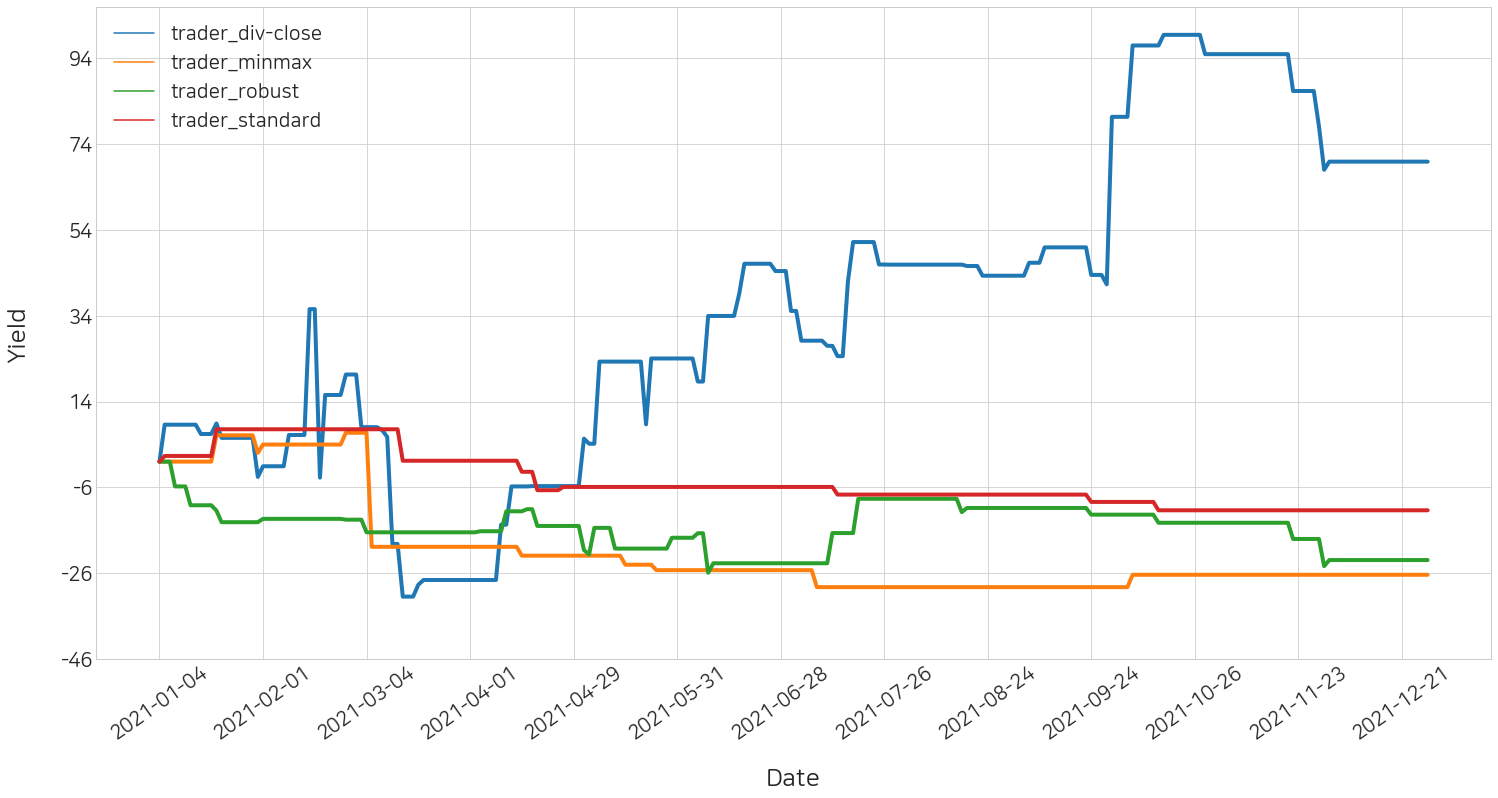

In [41]:
sai.yield_plot(df_history_all)

#### Min-max, standard, and robust scalers were located in similar sections, and it can be seen that the div-close scaling method has the highest return.